## Libraries

In [130]:
## !pip install pandas
## !pip install mlxtend

## !pip install onnxmltools

## !pip install onnxruntime

     ---------------------------------------- 6.5/6.5 MB 29.8 MB/s eta 0:00:00
     ---------------------------------------- 6.4/6.4 MB 81.9 MB/s eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 86.8/86.8 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 536.2/536.2 kB ? eta 0:00:00
     ---------------------------------------- 109.2/109.2 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyreadline: filename=pyreadline-2.1-py3-none-any.whl size=93855 sha256=4cf298a1b2b3b29a958f30629994a47ed8eaf668431da293d0fc6b907d4c4c92
  Stored in directory: c:\users\jgandiba\appdata\local\pip\cache\wheels\2c\ba\0a\79cfdda2594b992540020a641a4abc70764064f532acbe56b4
Successfully built pyreadline


In [131]:
import numpy as np
import torch
import pandas as pd
## pandas lib could work csv file

import sklearn
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [132]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split 
from torch.utils.data import TensorDataset, DataLoader

## standard metrics in regression
## coefficeint in determination
from sklearn.metrics import r2_score


In [133]:

import xgboost as xgb


In [134]:

import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType


## Parameters

In [135]:
batch_size = 16
learning_rate = 0.005
N_Epochs = 100

epsilon = 0.0001

## Read data 

In [136]:

path_data = 'data/winequality-white.csv'

WINE_raw_data = pd.read_csv (path_data, delimiter = ";")

## WINE_raw_data -d csv file iig duudaj ugj bn.

In [137]:
WINE_raw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [138]:
## headers_list

headers_list = WINE_raw_data.columns.values.tolist ()
##csv file iin header deer bga medeelliig avj list helberluu shiljuulj label hiihdee ashiglahad beldej bna

headers_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [139]:
headers_list2 = ['density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

## Data Analysis

* Correlation Matrix


<function matplotlib.pyplot.show(close=None, block=None)>

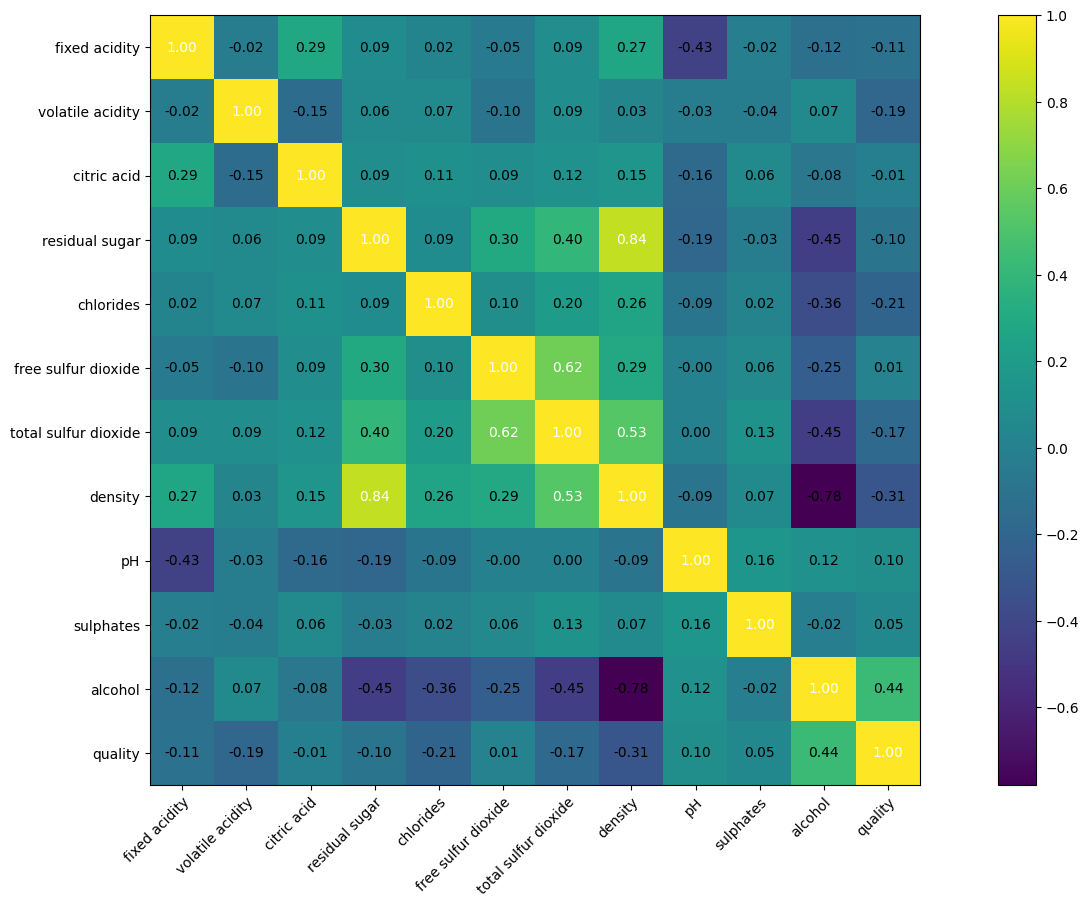

In [140]:
cm = np.corrcoef ( WINE_raw_data[headers_list].values.T  )
hm = heatmap (cm, row_names = headers_list, column_names = headers_list, figsize= (20,10))
## heatmap in doorhi turlii medeelliig haruuldag function.
## if value was 1, those values have positive correlation 
## if value was -1, those values have negative correlation
## if value was 0, there is no correlation between 2 values
## doorhi uzuulsen medeellees quality bolon alcohol 2 iin hoorondin hamaaral hamgiin undur bga gesen medeelel harj boloh n, column quality iin hamgiin undur utga avsan n 0.44 alcohol bn

plt.show

## Process Data

In [141]:
## Convert Pandas to Numpy
## CSV filed bsan datag Pandas aar unshij avsan bsanaa Numpy ruu hurvuulj deer n ajillahad beldej bn

WINE_raw_data_np = WINE_raw_data.to_numpy()


In [142]:
WINE_raw_data_np

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [143]:
WINE_raw_data_np.shape

(4898, 12)

In [144]:
## indexing data

X = WINE_raw_data_np [:, :-1]
## , buh row iig avna. columns aas suuliin negiig songoj avna (slicing)

y = WINE_raw_data_np [:,11:12]



In [145]:
print (X.shape)
print (y.shape)

(4898, 11)
(4898, 1)


In [146]:
random_seed = int (random.random() *100) ## 42

In [147]:
## split X and y

## ????????

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = random_seed)

In [148]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3918, 11)
(980, 11)
(3918, 1)
(980, 1)


## Fix in case float64 error

In [149]:
y_test.dtype ## sometimes torch gives you problem because of data had different data type 

dtype('float64')

In [150]:
## fix data type

X_train = X_train.astype (np.float32)
X_test = X_test.astype (np.float32)
y_train = y_train.astype (np.float32)
y_test = y_test.astype (np.float32)

In [151]:
X_train.dtype
X_test.dtype
y_train.dtype
y_test.dtype

dtype('float32')

In [152]:
## convert data to torch from Numpy

X_train_tr = torch.from_numpy (X_train)
X_test_tr  = torch.from_numpy (X_test)
y_train_tr = torch.from_numpy (y_train)
y_test_tr  = torch.from_numpy (y_test)


## Normalization

* Normalization
* Standardization (*)

In [153]:
## X_scaled = (X - x_means)/X_standard_dev

x_means      = X_train_tr.mean (0, keepdim = True )
x_deviations = X_train_tr.std (0, keepdim = True ) + epsilon


In [154]:

x_means


tensor([[6.8481e+00, 2.7800e-01, 3.3456e-01, 6.4522e+00, 4.6116e-02, 3.5490e+01,
         1.3875e+02, 9.9406e-01, 3.1909e+00, 4.8881e-01, 1.0512e+01]])

In [155]:

x_deviations 


tensor([[8.3759e-01, 1.0040e-01, 1.1959e-01, 5.1073e+00, 2.2663e-02, 1.6537e+01,
         4.2581e+01, 3.1251e-03, 1.5095e-01, 1.1323e-01, 1.2335e+00]])

## Create the DataLoader

In [156]:
train_ds = TensorDataset ( X_train_tr, y_train_tr )

In [157]:
train_dl = DataLoader (train_ds, batch_size , shuffle=True )

## surgah ugugdluu shuffle hiij holij surgahdaa dahin ashiglana.

In [158]:
train_dl

## Neural Network Architectures

In [159]:

## Linear Regression

class LinRegNet (nn.Module):
    ## nn class is neural network class
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means       ##
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear (11,1)
        ## 11,1 those values depend on data.
        
    ## perform inference
    def forward (self, x):
        
        x = (x - self.x_means)/ self.x_deviations
        
        y_pred = self.linear1(x)
        
        ## return torch.round (y_pred)
        return y_pred
    
    

## Training Loop

In [160]:

def training_loop (N_Epochs, model, loss_fn, opt):
    
    for epoch in range (N_Epochs):
        for xb, yb in train_dl:
            
            y_pred = model (xb)
            loss = loss_fn (y_pred, yb)
            
            opt.zero_grad ()
            loss.backward ()
            opt.step ()
        if epoch % 20 == 0:
            print (epoch, "loss=", loss)
            
        
            


In [161]:

## model = LinRegNet ( x_means, x_deviations )
model = LinRegNet ( x_means, x_deviations )

opt = torch.optim.Adam ( model.parameters(), lr =learning_rate )
## optimazation - gradient descent

loss_fn = F.mse_loss 
## belen loss function iig duudaj bn. MSE

training_loop (N_Epochs, model, loss_fn, opt)

0 loss= tensor(22.8409, grad_fn=<MseLossBackward0>)
20 loss= tensor(0.4960, grad_fn=<MseLossBackward0>)
40 loss= tensor(1.3194, grad_fn=<MseLossBackward0>)
60 loss= tensor(0.4785, grad_fn=<MseLossBackward0>)
80 loss= tensor(0.5634, grad_fn=<MseLossBackward0>)


## Evaluate Model

In [162]:

y_pred_test = model ( X_test_tr )


In [163]:
y_pred_test.shape

torch.Size([980, 1])

In [164]:

## r2_score is predicted x

## y_pred_test


In [165]:
print ( "Testing R**2: ", r2_score ( y_test_tr.numpy(), y_pred_test.detach().numpy() ) )

## range 0 - 1, best is 1

Testing R**2:  0.28918602614633193


In [166]:

y_pred_test.shape


torch.Size([980, 1])

In [167]:

y_test_tr.shape


torch.Size([980, 1])

In [168]:
len(X_test_tr)

980

In [169]:

list_preds = []
list_reals = []

for i in range (len(X_test_tr)):
    print ("******************")
    print ("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print (np_pred[0],",", np_real[0])
    list_preds.append (  np_pred[0] )
    list_reals.append (  np_real[0] )
    

******************
pred, real
6.584847 , 7.0
******************
pred, real
6.5409856 , 7.0
******************
pred, real
6.4977345 , 4.0
******************
pred, real
5.530324 , 5.0
******************
pred, real
6.094209 , 6.0
******************
pred, real
6.1641836 , 5.0
******************
pred, real
5.5110946 , 4.0
******************
pred, real
5.4734435 , 6.0
******************
pred, real
5.097743 , 5.0
******************
pred, real
6.4008493 , 6.0
******************
pred, real
5.382676 , 6.0
******************
pred, real
5.2321115 , 5.0
******************
pred, real
6.601239 , 7.0
******************
pred, real
6.912487 , 6.0
******************
pred, real
5.600353 , 5.0
******************
pred, real
6.060152 , 6.0
******************
pred, real
5.815068 , 6.0
******************
pred, real
5.9696336 , 5.0
******************
pred, real
5.9307137 , 6.0
******************
pred, real
6.514431 , 5.0
******************
pred, real
5.135104 , 5.0
******************
pred, real
5.3539205 , 5.0


## Visualize test predictions

In [170]:

def plot_preds_vs_reals (list_preds, list_reals):
    ## 
    plt.figure (figsize = (13, 4))
    plt.plot (list_reals, label = 'real', color = 'r')
    plt.plot (list_preds, label = 'pred')
    plt.show ()


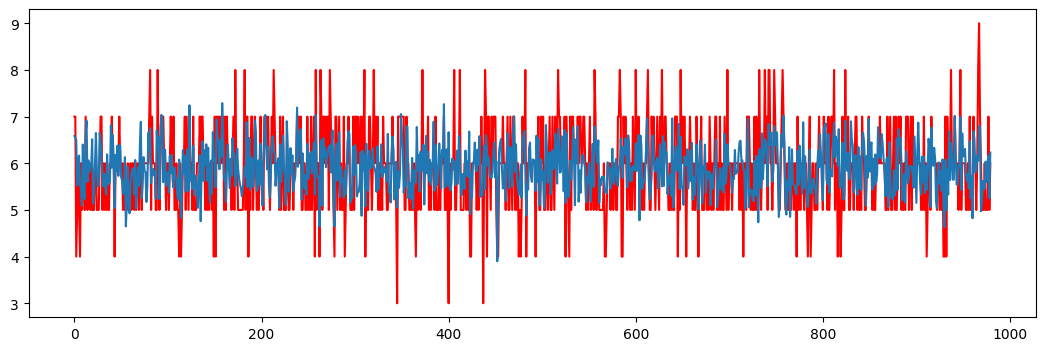

In [171]:

plot_preds_vs_reals (list_preds, list_reals)


## Deploy PyTorch Model

In [172]:

model.eval ()

dummy_input = torch.randn (1, 11)

input_names = ["input1"]
output_names = ["output1"]

torch.onnx.export(
    model,
    dummy_input,
    "DLnet_WineData.onnx",
    verbose=False,
    input_names = input_names,
    output_names = output_names
)


## XGBoost

In [173]:

regressor = xgb.XGBRegressor (
        
        n_estimators = 100,
        reg_lambda = 1,
        gamma = 0,
        max_depth = 10

)


In [174]:

regressor.fit (X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [175]:

y_pred = regressor.predict (X_test)


In [176]:

y_pred.shape


(980,)

In [177]:

y_pred


array([6.288955 , 6.989703 , 5.3389   , 4.998234 , 5.824634 , 4.7767897,
       5.7090163, 5.982345 , 5.002257 , 5.838517 , 5.778961 , 5.000766 ,
       6.646508 , 6.0010867, 5.132854 , 5.44322  , 6.1390486, 5.5137177,
       6.5473895, 5.7825375, 4.928413 , 5.170878 , 6.0007176, 6.005114 ,
       5.0145473, 5.1374803, 5.576339 , 6.0015364, 6.9994144, 6.987885 ,
       6.0944963, 5.2221694, 5.9619207, 5.998532 , 5.3779287, 5.8829417,
       5.1685004, 5.000894 , 4.6706576, 6.1109705, 5.8934865, 5.7564173,
       5.500304 , 5.152984 , 5.316735 , 5.9962707, 6.385916 , 5.986991 ,
       6.086847 , 6.610548 , 6.0742755, 5.7614007, 4.8548574, 5.4594417,
       6.183466 , 4.264212 , 5.0031385, 7.048013 , 5.229863 , 5.0020933,
       5.594382 , 5.6674137, 6.3147   , 6.3965025, 5.9789486, 5.5381403,
       4.9976125, 5.4993534, 5.646006 , 5.0755854, 5.999544 , 7.249452 ,
       5.0011067, 5.998192 , 6.0685062, 5.9991784, 5.563926 , 5.655915 ,
       5.3980885, 6.9893184, 6.2915425, 6.3210225, 

In [178]:

r2_score (y_test, y_pred)


0.48412168392773847

## Deploy XGBoost Model

* ONNX and GitHub

In [182]:

initial_types = [(
            'float_input',
            FloatTensorType( [None, 11] )

)]


In [183]:

onnx_model = onnxmltools.convert_xgboost(regressor, initial_types = initial_types)

onnxmltools.utils.save_model(onnx_model, 'xgboost_WineQuality_ort.onnx')


In [184]:

sess = rt.InferenceSession ('xgboost_WineQuality_ort.onnx')


In [185]:

input_name = sess.get_inputs () [0].name


In [186]:
input_name

'float_input'

In [187]:

label_name = sess.get_outputs ()[0].name


In [188]:
label_name

'variable'

In [189]:

pred_ort = sess.run( [label_name], {input_name: X_test.astype(np.float32) } )


In [192]:
pred_ort [0]

array([[6.288954 ],
       [6.989704 ],
       [5.3388987],
       [4.9982343],
       [5.824632 ],
       [4.77679  ],
       [5.7090163],
       [5.982346 ],
       [5.0022583],
       [5.8385177],
       [5.7789636],
       [5.0007653],
       [6.6465044],
       [6.001085 ],
       [5.132852 ],
       [5.443221 ],
       [6.1390476],
       [5.513716 ],
       [6.5473905],
       [5.782537 ],
       [4.928415 ],
       [5.170879 ],
       [6.0007176],
       [6.005113 ],
       [5.0145464],
       [5.13748  ],
       [5.5763373],
       [6.001535 ],
       [6.9994154],
       [6.987884 ],
       [6.094497 ],
       [5.22217  ],
       [5.9619193],
       [5.998533 ],
       [5.377928 ],
       [5.882942 ],
       [5.1685004],
       [5.000894 ],
       [4.6706586],
       [6.110969 ],
       [5.893488 ],
       [5.7564163],
       [5.500305 ],
       [5.152983 ],
       [5.3167353],
       [5.99627  ],
       [6.385914 ],
       [5.9869905],
       [6.0868483],
       [6.6105456],
